** HALLO

Vette shit hier

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import sys
from IPython import display

def print_fl(output):
    print(output)
    sys.stdout.flush()

Hallo

In [2]:
T = 100.0
h = 0.01
numSteps = int(T/h)
t = 0

M = 3
n = 4*M**3
v = np.zeros((numSteps,n,3))
r = np.zeros((numSteps,n,3))
v_hat = np.zeros((numSteps,n,3))
m = 1.0
beta = 1.0
sigma_v = np.sqrt(1/(beta * m))/100


F = np.zeros((numSteps,n,3))

L = 1.0



In [3]:
def initialise():
    global T, h, numSteps, t, M, n, v, r, v_hat, m, beta, sigma_v, F, L
    i = 0
    for mx in range(0, M):
        for my in range(0, M):
            for mz in range(0, M):
                r[t,i,0] = L*mx/M; r[t,i,1] = L*my/M; r[t,i,2] = L*mz/M
                i += 1
                r[t,i,0] = L*(mx+0.5)/M; r[t,i,1] = L*(my+0.5)/M; r[t,i,2] = L*mz/M
                i += 1
                r[t,i,0] = L*(mx+0.5)/M; r[t,i,1] = L*my/M; r[t,i,2] = L*(mz+0.5)/M
                i += 1
                r[t,i,0] = L*mx/M; r[t,i,1] = L*(my+0.5)/M; r[t,i,2] = L*(mz+0.5)/M
                i += 1
    v[t,:,:] = np.random.normal(0.0, sigma_v, size=(n,3))
    v[t,:,:] = v[t,:,:] - np.mean(v[t,:,:], axis=0)
    
def calculate_forces():
    global T, h, numSteps, t, M, n, v, r, v_hat, m, beta, sigma_v, F, L 
    # give all particles a small force in x direction
    F[t,:,0] = 0.0
    
def update_coordinates():
    global T, h, numSteps, t, M, n, v, r, v_hat, m, beta, sigma_v, F, L
    v_hat[t,:,:] = v[t,:,:] + h * F[t,:,:]/2
    r[t + 1,:,:] = (r[t,:,:] + h * v_hat[t,:,:]) % L
    
    t += 1
    calculate_forces()
    v[t,:,:] = v_hat[t-1,:,:] + h*F[t,:,:] / 2

In [4]:
def do_simulation():
    global T, h, numSteps, t, M, n, v, r, v_hat, m, beta, sigma_v, F, L
    start_visualisation()
    
    initialise()
    calculate_forces()
    while(t < numSteps - 2):
        if (t % 100 == 0):
            #print_fl("Time step: " + str(t))
            visualize()   
        update_coordinates()

fig = None
ax = None

def start_visualisation():
    global T, h, numSteps, t, M, n, v, r, v_hat, m, beta, sigma_v, F, L
    global fig, ax
    %matplotlib inline
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

def visualize():
    global T, h, numSteps, t, M, n, v, r, v_hat, m, beta, sigma_v, F, L
    global fig, ax
    ax.cla()
    ax.scatter(r[t,:,0], r[t,:,1], r[t,:,2])
    ax.set_xlim((0.0, 1.0))
    ax.set_ylim((0.0, 1.0))
    ax.set_zlim((0.0, 1.0))
    display.clear_output(wait=True)
    display.display(fig)
    #time.sleep(0.05)

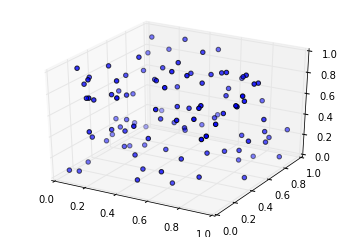

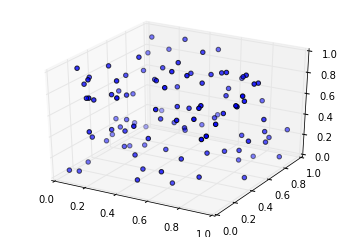

In [5]:
do_simulation()
    